# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# сохраним исходную длину массива в переменной init_df_len
init_df_len = len(df)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Столбцы в данных имеют следующее значение:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод

1. В данных имеется достаточно много незаполненных ячеек. Такие ячейки имеются в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, ponds_nearest
2. Данные в столбце is_apartment имеют тип object, хотя должны иметь булев тип
3. Минимальное значение цены квартиры в столбце last_price составлет 12 190 что похоже на аномальное значение или ошибку. Необходимо исследовать столбец на корректность данных. 
4. Минимальная высота потолков в рассматриваемых квартирах указана 1 м, а максимальная 100 м, что так же подозрительно
5. Необходимо конвертировать столбец first_day_exposition в тип DateTime
6. Количество комнат указанное в столбце rooms для некоторых записей указано равным нулю, что не похоже на действительность.


### Шаг 2. Предобработка данных
Предобработку данных начнем со столбцов для которые в основном необходимы для ответа на поставленные заказчиком вопросы: площадь, цена, число комнат, высота потолков

#### Предобработка столбца last_price - цена на момент снятия с публикаци
Построем гистограмму и оценим параметры распределения

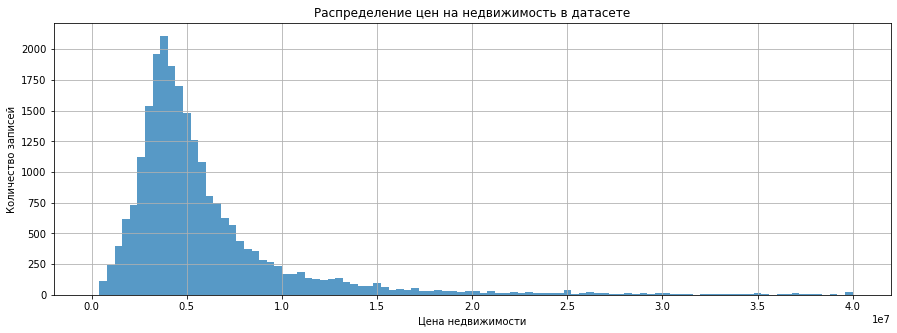

In [4]:
(df['last_price'].hist(bins=100, range=(0, 40e6), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Цена недвижимости', ylabel='Количество записей',  title='Распределение цен на недвижимость в датасете'));

In [5]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Средняя цена в 1,4 больше чем медиана, что обусловленно надичием длинного хвоста в распределении. Оценим число квартир с аномально высокими ценами

In [6]:
PRISE_LIMIT = 20e6

print('Доля квартир с ценой более {:.0f}'.format(PRISE_LIMIT), 
      'составляет {:.1%}'.format(len(df[df['last_price']>PRISE_LIMIT])/len(df)))

Доля квартир с ценой более 20000000 составляет 3.0%


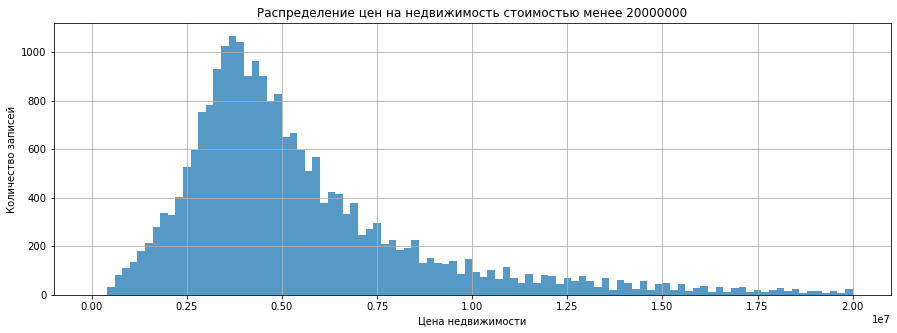

In [7]:
(df.query('last_price < @PRISE_LIMIT')['last_price'].hist(bins=100, range=(0, PRISE_LIMIT), figsize=(15, 5), alpha = 0.75)
.set(xlabel='Цена недвижимости', ylabel='Количество записей', 
     title='Распределение цен на недвижимость стоимостью менее {:.0f}'.format(PRISE_LIMIT)));

Проверим наличие квартир с очень низкими ценами (менее 400 000)

In [8]:
df[df['last_price']<0.4e6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Очевидно, что цена 12190 за двухкомнатную квартиру в Санкт-Петербурге является ошибкой. Возможно автор хотел создать объявление о сдаче в аренду квартиры, а не о ее продаже. Удалим эту строчку из набора данных

In [9]:
df = df.drop(df[df['last_price']<0.4e6].index)
# убедимся что датафрейм больше не содержит ошибочных данных с низкой ценой
df[df['last_price']<0.4e6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Предобработка столбца total_area площадь квартиры в квадратных метрах (м²)

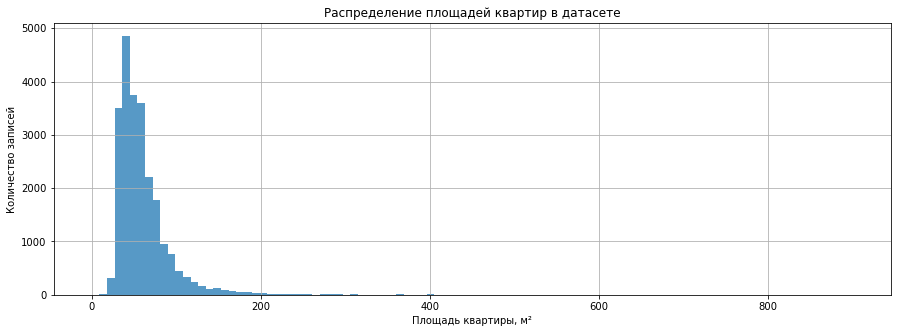

In [10]:
(df['total_area'].hist(bins=100, range=(0, 900), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Площадь квартиры, м²', ylabel='Количество записей',  title='Распределение площадей квартир в датасете'));

In [11]:
df['total_area'].describe()

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

Распределение имеет большие выбросы. Оценим долю квартир в распределении с большой площадью

In [12]:
AREA_LIMIT = 300

print('Доля квартир с площадью более {:.0f} м²'.format(AREA_LIMIT), 
      'составляет {:.1%}'.format(len(df[df['total_area']>AREA_LIMIT])/len(df)))

Доля квартир с площадью более 300 м² составляет 0.3%


Доля квартир с большой площадью не велика. Удалим строки содержащие выбросы, чтобы они не мешали дальнейшему анализу

In [13]:
df = df.drop(df[df['total_area']>AREA_LIMIT].index)
# проверим что удаление сработало корректно
df[df['total_area']>AREA_LIMIT]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Предобработка столбца rooms — число комнат

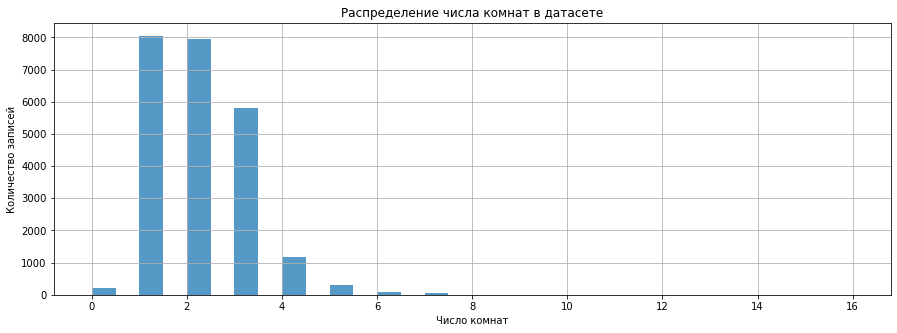

In [14]:
(df['rooms'].hist(bins=32, range=(0, 16), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Число комнат', ylabel='Количество записей',  title='Распределение числа комнат в датасете'));

In [15]:
df['rooms'].describe()

count    23637.000000
mean         2.059145
std          1.045571
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Среднее незначительно отличается от медианы, что говорит об отсутствии длинных хвостов в распределении, однако в глаза бросаются квартиры с количеством комнат равным нулю. Скорее всего это связано с тем, что пользователь не заполнил поле число комнат при создании объявления. Оценим долю таких квартир

In [16]:
print('{:.1%}'.format(len(df[df['rooms']==0]) / len(df)))

0.8%


Построим зависимость площади квартиры от числа комнат при числе комнат не равным нулю

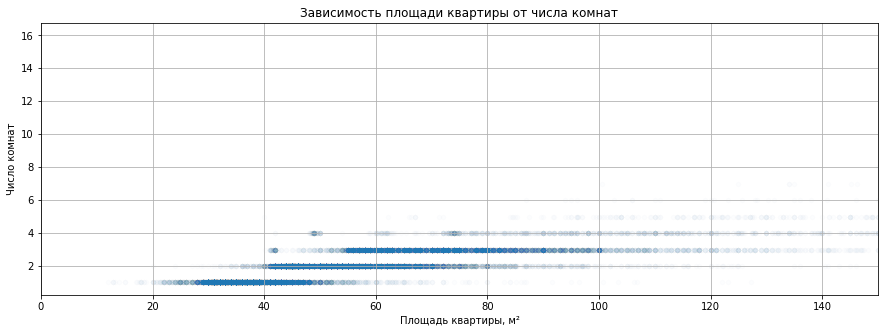

In [17]:
(df[df['rooms']!=0].plot(x='total_area', y='rooms', kind='scatter', figsize=(15, 5), alpha=0.01, grid=True, xlim=(0, 150))
 .set(xlabel='Площадь квартиры, м²', ylabel='Число комнат',  title='Зависимость площади квартиры от числа комнат'));

Видно, что основную массу в продажах занимают 1-3 комнатные квартиры. При этом квартиры менее 40 м2 в большинстве случаев являются однокомнатными. Чтобы дополнительно убедиться в этом создадим сводную таблицу средней и медианной площади квартир в зависимости от числа комнат

In [18]:
total_area_group_by_rooms = df.groupby('rooms')['total_area'].agg(['count','mean','median'])
total_area_group_by_rooms

,count,mean,median
rooms,,,
0,196,27.536276,26.025
1,8046,37.587938,36.530
2,7939,55.848395,53.000
3,5813,77.715495,73.000
4,1175,106.333123,99.000
5,310,150.444484,144.500
6,96,184.870313,180.000
7,43,197.006977,201.500
8,8,215.862500,229.500


Построим гистограмму распределения площади квартир для которых число комнат указано равным нулю

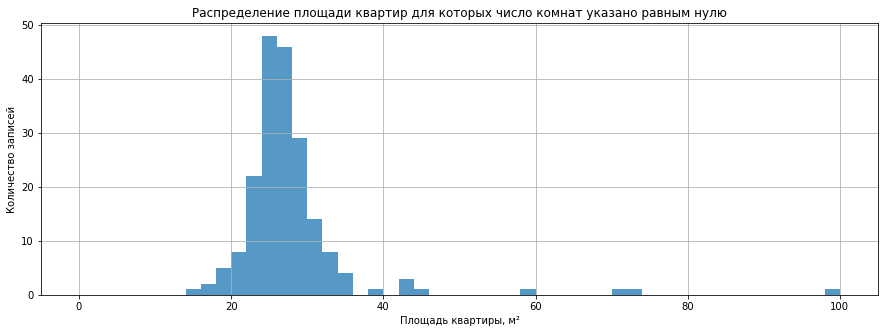

In [19]:
(df[df['rooms']==0]['total_area'].hist(bins=50, range=(0, 100), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Площадь квартиры, м²', ylabel='Количество записей', 
      title='Распределение площади квартир для которых число комнат указано равным нулю'));

Из распределения видно, что большинство квартир с неуказанным количеством комнат имеет площадь менее 40 м², что позволяет с высокой долей вероятности классифицировать их как однокомнатные. Оценим долю квартир с неуказанным количеством комнат и площадью более 40м²

In [20]:
print('{:.2%}'.format(len(df[(df['rooms']==0) & (df['total_area']>40)]) / len(df)))

0.03%


Доля квартир с количеством комнат равным нулю и площадью более 40 м² состовляет 0,03% от общего числа данных. В виду сложности классификации таких данных по количеству комнат и незначительности их в общей выборке такие данные можно удалить, а остальные квартиры с незаполнеными значениями классифицировать как однокомнатные

In [21]:
df = df.drop(df[(df['rooms']==0) & (df['total_area']>40)].index)
df['rooms'].replace(to_replace=0, value=1, inplace=True)
# проверяем что в данных не осталось комнат со значением 0
df[df['rooms']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Предобработка столбца ceiling_height — высота потолков (м)

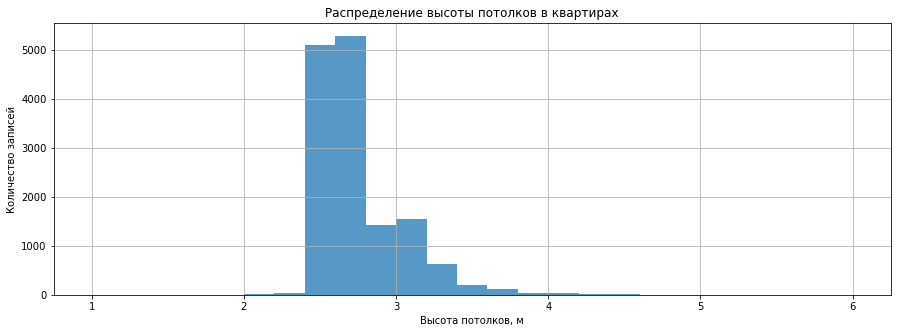

In [22]:
(df['ceiling_height'].hist(bins=25, range=(1, 6), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Высота потолков, м', ylabel='Количество записей', 
      title='Распределение высоты потолков в квартирах'));

In [23]:
df['ceiling_height'].describe()

count    14458.000000
mean         2.769218
std          1.261758
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данных встречается высота потолков 100 м. Для сравнения самое высокое здание в Санкт-Петербурге - Лахта-центр - имеет высоту здания при 87 этажах почти 462 метра, из которых 117,75 метра приходятся на шпиль из металлоконструкций весом более 2000 тонн
(https://peterburg.center/ln/samye-vysokie-zdaniya-sankt-peterburga-top-10-dominant-v-severnoy-stolice-reyting-2019.html).
Конечно такие данные являются ошибкой ввода. Кроме того данные содержат квартиры с высотой потолков 1 м, что так же наверняка не соответствует действительности. Оценим число записей с высотой потолков более 5 м и менее 2 м


In [24]:
len(df[df['ceiling_height']>=5])

34

In [25]:
len(df[df['ceiling_height']<=2])

14

Число записей с аномально высокими и аномально низкими потолками не велико, поэтому из данных такие сведения можно удалить без ущерба для статистических характеристик. После удаления выбросов пропущенные данные можно заполнить медианой.

In [26]:
df = df.drop(df[(df['ceiling_height']>=5) | (df['ceiling_height']<=2)].index)
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
# проверим что замена прошла успешно и незаполненных значений не осталось
df['ceiling_height'].isna().sum()

0

#### Предобработка столбца floors_total — всего этажей в доме

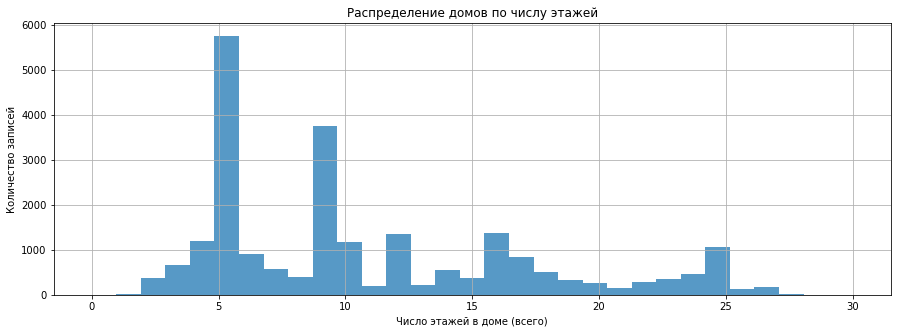

In [27]:
(df['floors_total'].hist(bins=31, range=(0, 30), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Число этажей в доме (всего)', ylabel='Количество записей', 
      title='Распределение домов по числу этажей'));

In [28]:
df['floors_total'].describe()

count    23495.000000
mean        10.686529
std          6.595193
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В основном в России встречаются пяти и девяти этажные здания, что и отражает гистограмма. Оценим долю пропущенных значений в столбце floors_total.

In [29]:
print('{:.1%}'.format(df['floors_total'].isna().sum() / len(df)))

0.4%


Восстановить число этажей в доме можно было бы, например, зная адрес и имея реестр недвижимости. Восстановить общее число этажей в доме по имеющимся данным не представляется возможным. В виду незначительного количества таких записей в общей массе такие значения предлагается из выборки исключить

In [30]:
df = df.drop(df[df['floors_total'].isna()].index)
# проверяем что все незаполненные значения исключены
df['floors_total'].isna().sum()

0

#### Предобработка столбца living_area — жилая площадь в квадратных метрах (м²)

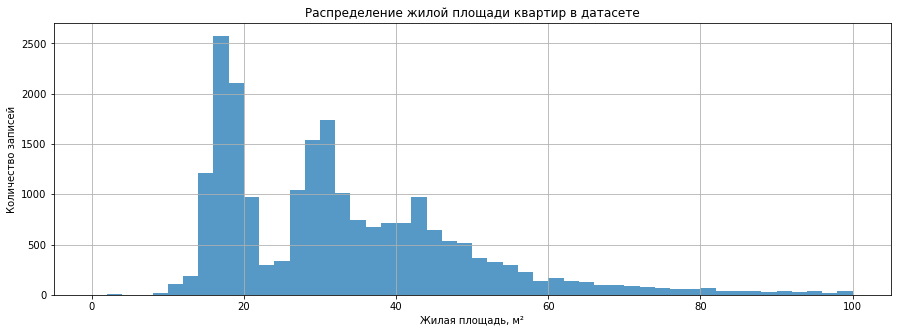

In [31]:
(df['living_area'].hist(bins=50, range=(0, 100), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Жилая площадь, м²', ylabel='Количество записей', 
      title='Распределение жилой площади квартир в датасете'));

In [32]:
df['living_area'].describe()

count    21642.000000
mean        34.030332
std         19.837835
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64

Распределение жилой площади фактически состоит из суммы нескольких нормальных распределений (мод). Можно предположить, что первая мода с матожиданием в районе 18 м² сформирована из однокомнатных квартир, мода с матожиданием в районе 30 м² сформирована из двухкомнатных квартир, а третья мода формирующая "юбку" представлена остальными квартирами и из-за этого имеет высокую дисперсию. Построим отдельные гистограммы для числа комнат 1, 2 и более двух.

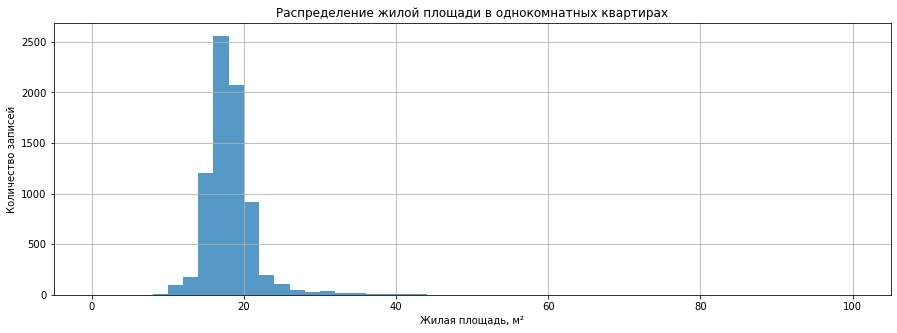

In [33]:
(df[df['rooms']==1]['living_area'].hist(bins=50, range=(0, 100), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Жилая площадь, м²', ylabel='Количество записей', 
      title='Распределение жилой площади в однокомнатных квартирах'));

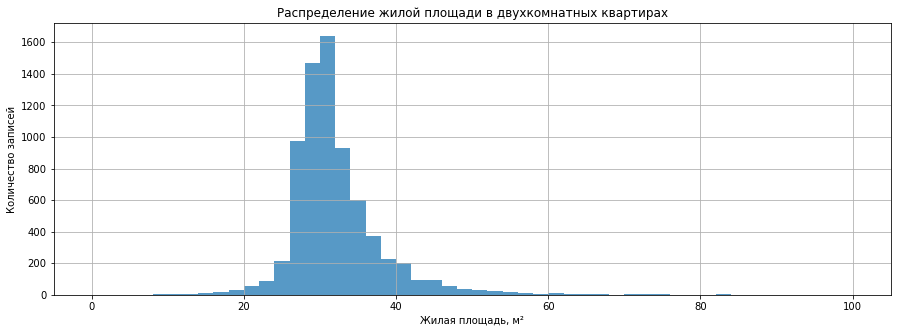

In [34]:
(df[df['rooms']==2]['living_area'].hist(bins=50, range=(0, 100), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Жилая площадь, м²', ylabel='Количество записей', 
      title='Распределение жилой площади в двухкомнатных квартирах'));

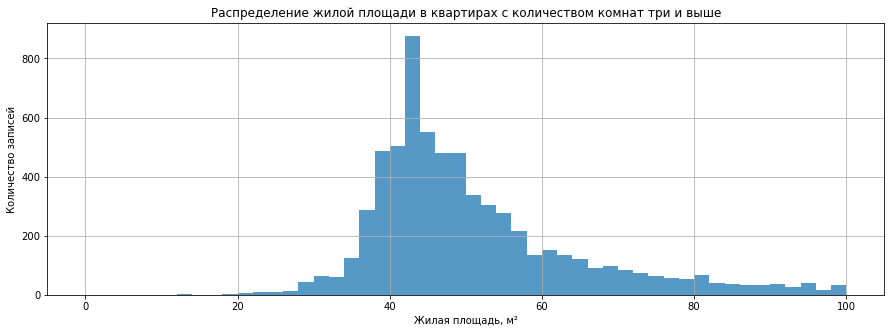

In [35]:
(df[df['rooms']>2]['living_area'].hist(bins=50, range=(0, 100), figsize=(15, 5), alpha = 0.75)
  .set(xlabel='Жилая площадь, м²', ylabel='Количество записей', 
      title='Распределение жилой площади в квартирах с количеством комнат три и выше'));

Как видно предположение подтвердилось. Для того чтобы не учитывать зависимость распределения от количества комнат введем в данных столбец living_area_fraction в который запишем какую долю занимает жилая площадь от общей площади (произведем нормировку) и построим гистограмму

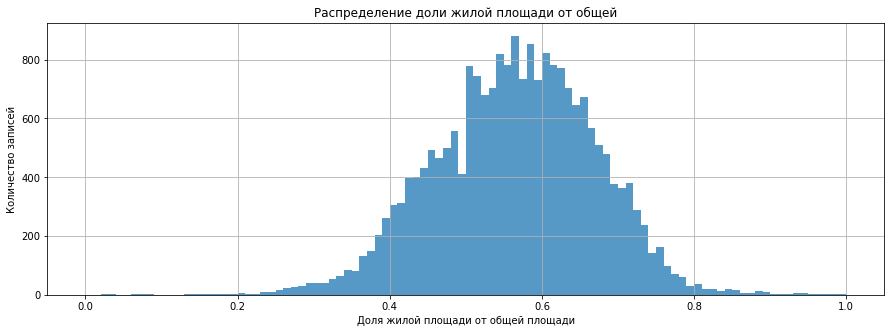

In [36]:
df['living_area_fraction'] = df['living_area'] / df['total_area']
(df['living_area_fraction'].hist(bins=100, range=(0, 1), figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Доля жилой площади от общей площади', ylabel='Количество записей', 
      title='Распределение доли жилой площади от общей'));

In [37]:
df['living_area_fraction'].describe()

count    21642.000000
mean         0.564865
std          0.105142
min          0.021583
25%          0.495370
50%          0.568013
75%          0.637804
max          1.000000
Name: living_area_fraction, dtype: float64

Гистограмма доли жилой площади от общей площади уже имеет одну моду и близка к нормальной. В среднем жилая площадь составляет 56% от общей доли. Прежде чем перейти к заполнению пропусков уберем из данных хвосты распределения (выбросы) для которых доля жилой площади составляет менее 0,25 или более 0,9

In [38]:
df = df.drop(df[(df['living_area_fraction']<0.25) | (df['living_area_fraction']>0.9)].index)
# проверяем что необходимые данные исключены
len(df[df['living_area_fraction']<0.25]) + len(df[df['living_area_fraction']>0.9])

0

Заполним пропущенные значения в столбце living_area умножением общей площади данной квартиры на матожидание доли жилой площади по всем квартирам

In [39]:
df['living_area'].mask(df['living_area'].isna(), other=df['total_area']*df['living_area_fraction'].mean(), inplace=True)
# проверяем что незаполненных значений не осталось
df['living_area'].isna().sum()

0

#### Предобработка столбца kitchen_area — площадь кухни в квадратных метрах (м²)

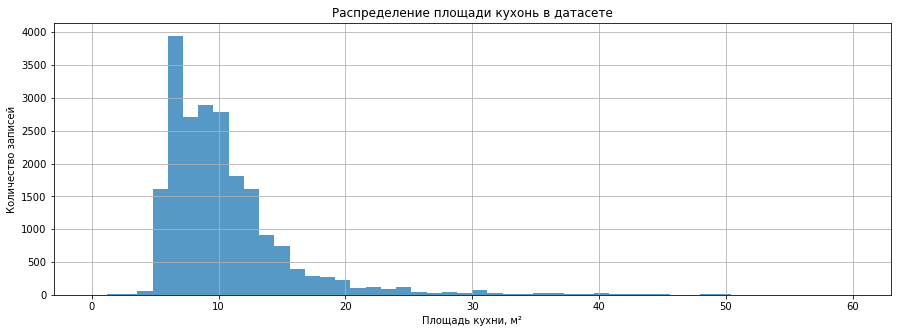

In [40]:
(df['kitchen_area'].hist(bins=50, range=(0, 60), figsize=(15, 5), alpha = 0.75)
  .set(xlabel='Площадь кухни, м²', ylabel='Количество записей', 
      title='Распределение площади кухонь в датасете'));

In [41]:
df['kitchen_area'].describe()

count    21231.000000
mean        10.475374
std          5.619567
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

В данных есть кухня с размерами 107 м². Возможно многие бы хотели себе такую кухню, но цифра заставляет задуматься. Подойдем к площади кухни так же как мы подходили к жилой площади. Отнормируем площадь кухни к нежилой площади (общая площадь минус жилая) и исключим из данных очень большие и очень маленькие значения

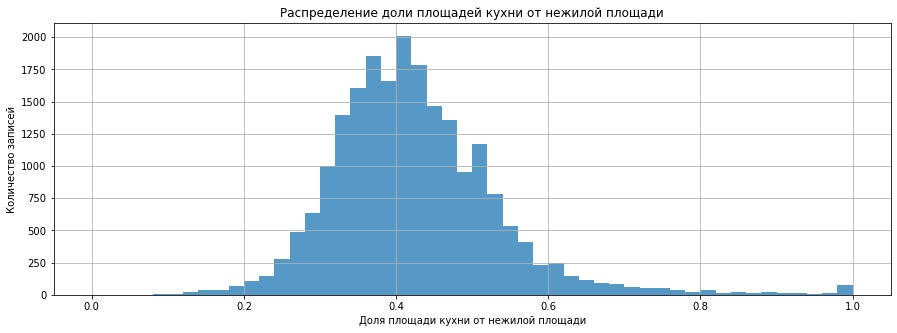

In [42]:
df['kitchen_area_fraction'] = df['kitchen_area'] / (df['total_area'] - df['living_area'])
(df['kitchen_area_fraction'].hist(bins=50, range=(0, 1), figsize=(15, 5), alpha = 0.75)
  .set(xlabel='Доля площади кухни от нежилой площади', ylabel='Количество записей', 
      title='Распределение доли площадей кухни от нежилой площади'));

In [43]:
len(df[df['kitchen_area_fraction']>0.95]) + len(df[df['kitchen_area_fraction']<0.05])

148

In [44]:
df = df.drop(df[(df['kitchen_area_fraction']>0.95) | (df['kitchen_area_fraction']<0.05)].index)
# проверяем что необходимые данные исключены
len(df[df['kitchen_area_fraction']>0.95]) + len(df[df['kitchen_area_fraction']<0.05])

0

In [45]:
df['kitchen_area_fraction'].describe()

count    21083.000000
mean         0.420609
std          0.103026
min          0.055928
25%          0.352941
50%          0.410959
75%          0.477300
max          0.946903
Name: kitchen_area_fraction, dtype: float64

В среднем кухня занимает 42% нежилой площади. Заменим пропущенные в столбце значения по аналогии с жилой площадью

In [46]:
df['kitchen_area'].mask(df['kitchen_area'].isna(), 
                        other=((df['total_area']-df['living_area'])*df['kitchen_area_fraction'].mean()), inplace=True)
# проверяем что незаполненных значений не осталось
df['kitchen_area'].isna().sum()

0

#### Предобработка столбца balcony — число балконов

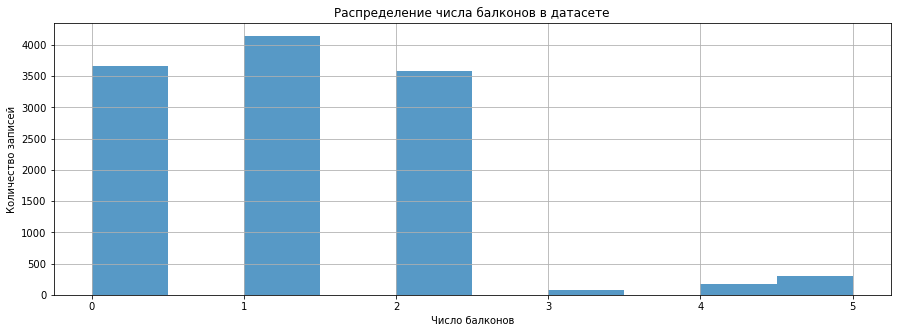

In [47]:
(df['balcony'].hist(bins=10, range=(0, 5), figsize=(15, 5), alpha = 0.75)
  .set(xlabel='Число балконов', ylabel='Количество записей', 
      title='Распределение числа балконов в датасете'));

In [48]:
df['balcony'].describe()

count    11952.000000
mean         1.150268
std          1.068804
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Подавляющее большинство квартир имеют не более двух балконов. Неуказанное пользователем число болконов заполним нулями

In [49]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].isna().sum()

0

#### Предобработка столбца locality_name — название населённого пункта

In [50]:
df['locality_name'].value_counts()

Санкт-Петербург                      15416
посёлок Мурино                         509
посёлок Шушары                         436
Всеволожск                             391
Пушкин                                 366
                                     ...  
деревня Выскатка                         1
садовое товарищество Приладожский        1
деревня Мины                             1
деревня Русско                           1
поселок Цвылёво                          1
Name: locality_name, Length: 362, dtype: int64

Подовляющее большинство квартир в выборке расположено в Санкт-Петербурге. Отсутствие данных о местоположении квартиры должно насторожить, так как местоположение один из ключевых параметров при выборе недвижимости. Оценим долю незаполненных строк в этой колонке

In [51]:
print('{:.1%}'.format(df['locality_name'].isna().sum() / len(df)))

0.2%


Доля незаполненных строк не высока. Поскольку местоположение это ключевой параметр данные с незаполненным названием населенного пункта лучше исключить

In [52]:
df = df.drop(df[df['locality_name'].isna()].index)
df['locality_name'].isna().sum()

0

#### Предобработка столбца cityCenters_nearest — расстояние до центра города (м)

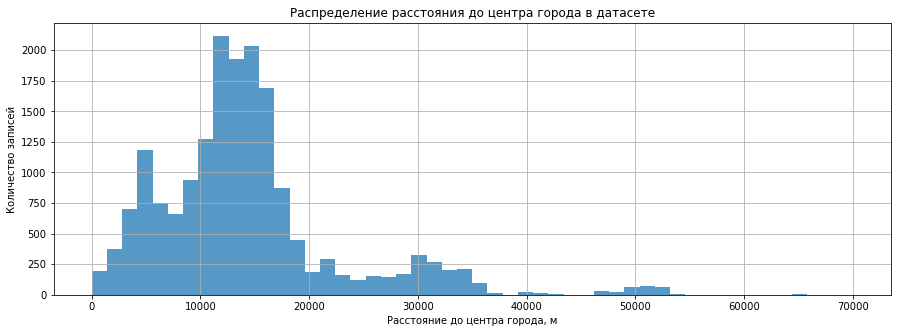

In [53]:
(df['cityCenters_nearest'].hist(bins=50, range=(0, 70e3), figsize=(15, 5), alpha = 0.75)
   .set(xlabel='Расстояние до центра города, м', ylabel='Количество записей', 
      title='Распределение расстояния до центра города в датасете'));

In [54]:
df['cityCenters_nearest'].describe()

count    17809.000000
mean     14232.387108
std       8611.276679
min        181.000000
25%       9315.000000
50%      13123.000000
75%      16298.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [55]:
df[df['cityCenters_nearest'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_fraction,kitchen_area_fraction
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684,0.568750
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430000,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320,0.496898
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000000,5,NaN,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.555556,0.375000
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,NaN,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.517241,0.392857
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.535504,2,NaN,...,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,25.881893,1,NaN,...,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.300000,9,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0,0.407500,0.489451
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.500000,3,NaN,...,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0,0.757576,0.419118
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,19.778739,8,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.800000,5,NaN,...,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.620865,0.399329


Данные в столбце cityCenters_nearest (как и в столбцах airports_nearest, parks_around3000, ponds_around3000, ponds_nearest) получены автоматически на основе картографических данных. Данные в этих столбцах в большинстве случаев отсутствуют одновременно, что может говорить о том что пользователь не указал адрес квартиры, данный адрес был введен некорректно или не найден. Заполнять пропущеные картографические данные медианой или средним некорректно так как положение уникально для каждого объекта. Оставим пропуски в картографических данных незаполненными

#### Предобработка столбца days_exposition — сколько дней было размещено объявление (от публикации до снятия)

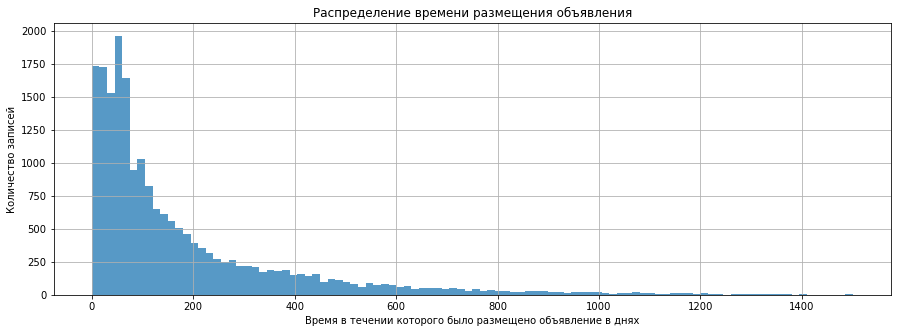

In [56]:
(df['days_exposition'].hist(bins=100, range=(0, 1500), figsize=(15, 5), alpha = 0.75)
    .set(xlabel='Время в течении которого было размещено объявление в днях', ylabel='Количество записей', 
      title='Распределение времени размещения объявления'));

In [57]:
df['days_exposition'].describe()

count    20104.000000
mean       180.893504
std        219.908483
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Половина объявлений держится в пределах 100 дней, но многие объявления висят годами. Среднее практически вдва раза больше медианы вследствии тяжелого и длинного хвоста у распределения. Посмотрим как менялось количество дней в течении которого размещено обявление от даты размещения. Для этого сначала присвоим столбцу first_day_exposition тип datetime, затем вычислим какое количество дней прошло от последней даты в датафрейме до даты размещения обявления, сохраним эту информацию в столбце days_passed и построим график

In [58]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23218, dtype: datetime64[ns]

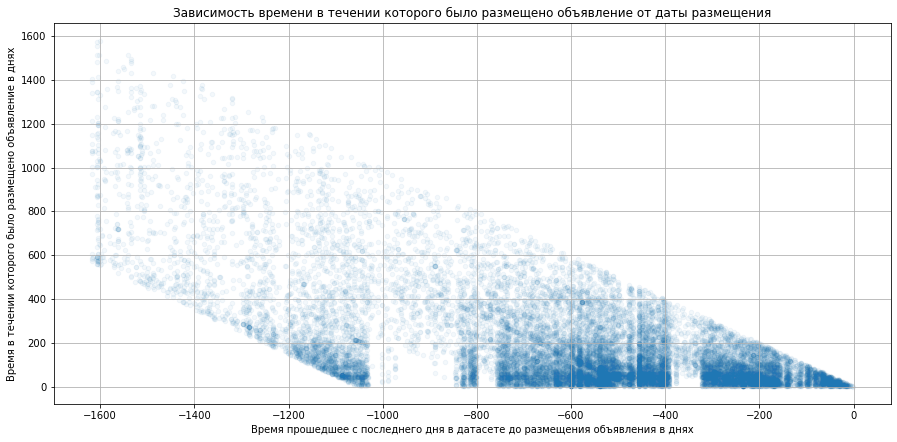

In [59]:
df['days_passed'] = (df['first_day_exposition'] - df['first_day_exposition'].max()).dt.days
(df.plot(x='days_passed', y='days_exposition', kind='scatter', alpha=0.05, figsize=(15,7), grid=True)
    .set(xlabel='Время прошедшее с последнего дня в датасете до размещения объявления в днях', 
         ylabel='Время в течении которого было размещено объявление в днях', 
         title='Зависимость времени в течении которого было размещено объявление от даты размещения'));

Из графика видно что распределение нестационарно (матожидание и дисперсия меняются во времени). При заполнении пропусков это необходимо учитывать. Разобъем датафрейм на группы по столбцу days_passed и посмотрим как меняются параметры распределения по времени

In [60]:
df['days_passed_group'] = pd.cut(df['days_passed'], 16)
df.groupby('days_passed_group')['days_exposition'].agg(['count','median','mean', 'std'])

,count,median,mean,std
days_passed_group,,,,
"(-1619.618, -1516.875]",239,875.0,907.983264,296.758425
"(-1516.875, -1415.75]",241,707.0,767.510373,293.441222
"(-1415.75, -1314.625]",279,619.0,681.218638,294.690349
"(-1314.625, -1213.5]",435,406.0,499.312644,278.962931
"(-1213.5, -1112.375]",896,220.5,339.507812,262.819551
"(-1112.375, -1011.25]",1183,134.0,243.450549,242.752488
"(-1011.25, -910.125]",339,473.0,485.395280,223.367854
"(-910.125, -809.0]",726,258.0,291.038567,215.868239
"(-809.0, -707.875]",1473,153.0,209.913103,181.320524


Заполним пропуски в столбце days_exposition медианой для соответствующей группы

In [61]:
df['days_exposition'] = df.groupby('days_passed_group')['days_exposition'].apply(lambda x: x.fillna(round(x.median())))
df['days_exposition'].isna().sum()

0

По сводной таблице видно что матожидание и дисперсия минимальны ближе к концу наблюдаемого периода и растут ближе к начачалу наблюдаемого периода. Возможно это связано с тем, что авторы разместившие объявление о продаже квартиры давно так и не убрали объявление с сайта. При этом продажи в пределах 100 дней можно считать "быстрыми", примерно половина продаж в представленной выборке происходит за это время. Продажи более 600 дней можно считать "необычно долгими".  Так же следут отметить что популярность сервиса (количество объявлений) начало значительно увеличиваться примерно за два года до окончания приведенного в данных периода.

#### Предобработка столбца is_apartment — указывает является ли недвижимость апартаментами
Оценим долю заполненных строк в столбце

In [62]:
print('{:.1%}'.format(df['is_apartment'].notna().sum() / len(df)))

11.7%


Доля заполненных строк в столбце is_apartment составляет менее 12%. Восстанавливать данные по такой малой выборке представляется затруднительным. В общем случае стоимость аппартаментов определяется теми же признаками что и стоимость обычных квартир поэтому столбец is_apartment является слабоинформативным и его можно удалить из данных.

In [63]:
df = df.drop('is_apartment', axis=1)
# проверим что столбца действительно больше нет в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23218 non-null  int64         
 1   last_price             23218 non-null  float64       
 2   total_area             23218 non-null  float64       
 3   first_day_exposition   23218 non-null  datetime64[ns]
 4   rooms                  23218 non-null  int64         
 5   ceiling_height         23218 non-null  float64       
 6   floors_total           23218 non-null  float64       
 7   living_area            23218 non-null  float64       
 8   floor                  23218 non-null  int64         
 9   studio                 23218 non-null  bool          
 10  open_plan              23218 non-null  bool          
 11  kitchen_area           23218 non-null  float64       
 12  balcony                23218 non-null  float64       
 13  l

#### Оценка доли удаленных строк
В процессе предобработки данных ряд строк был исключен из дальнейшей обработки. Оценим суммарные потери по количеству строк

In [64]:
print('Суммарное количество удаленных в процессе предобработки строк {:.1%}'.format(1 - (len(df) / init_df_len)))

Суммарное количество удаленных в процессе предобработки строк 2.0%


В процессе предобработки удалено порядка двух процентов строк, что является не существенными потерями. Качество данных следует признать удовлетворительным 

#### Замена типов данных
При замене используем следующие типы данных:
* uint8 для столбцов total_images, balcony, floor, floors_total, rooms так как данные в нем всегда целые положительные и не превышают 255
* int32 для столбцов days_exposition, days_passed так как данные в этих столбцах целые числа, но значения могут превышать 255
* bool для столбцов open_plan, studio
* datetime64 для столбца first_day_exposition так как внем храниться дата
* float32 - для столбцов ceiling_height, kitchen_area, last_price, living_area, total_area - так как это могут быть не целые числа, но одинарной точности вполне достаточно для их представления
* float64 - для всех картографических значений
* object - для столбца locality_name так как он содержит строковые переменные с названиями населенных пунктов

In [65]:
df.dtypes.apply(lambda x: x.name).to_dict()

{'total_images': 'int64',
 'last_price': 'float64',
 'total_area': 'float64',
 'first_day_exposition': 'datetime64[ns]',
 'rooms': 'int64',
 'ceiling_height': 'float64',
 'floors_total': 'float64',
 'living_area': 'float64',
 'floor': 'int64',
 'studio': 'bool',
 'open_plan': 'bool',
 'kitchen_area': 'float64',
 'balcony': 'float64',
 'locality_name': 'object',
 'airports_nearest': 'float64',
 'cityCenters_nearest': 'float64',
 'parks_around3000': 'float64',
 'parks_nearest': 'float64',
 'ponds_around3000': 'float64',
 'ponds_nearest': 'float64',
 'days_exposition': 'float64',
 'living_area_fraction': 'float64',
 'kitchen_area_fraction': 'float64',
 'days_passed': 'int64',
 'days_passed_group': 'category'}

In [66]:
df_type_dict = {
    
    'total_images': 'uint8',
    'last_price': 'float32',
    'total_area': 'float32',
    'first_day_exposition': 'datetime64[ns]',
    'rooms': 'uint8',
    'ceiling_height': 'float32',
    'floors_total': 'uint8',
    'living_area': 'float32',
    'floor': 'uint8',
    'studio': 'bool',
    'open_plan': 'bool',
    'kitchen_area': 'float32',
    'balcony': 'uint8',
    'locality_name': 'object',
    'airports_nearest': 'float64',
    'cityCenters_nearest': 'float64',
    'parks_around3000': 'float64',
    'parks_nearest': 'float64',
    'ponds_around3000': 'float64',
    'ponds_nearest': 'float64',
    'days_exposition': 'int32',
    'living_area_fraction': 'float32',
    'kitchen_area_fraction': 'float32',
    'days_passed': 'int32',
    'days_passed_group': 'category'
}
df = df.astype(df_type_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23218 non-null  uint8         
 1   last_price             23218 non-null  float32       
 2   total_area             23218 non-null  float32       
 3   first_day_exposition   23218 non-null  datetime64[ns]
 4   rooms                  23218 non-null  uint8         
 5   ceiling_height         23218 non-null  float32       
 6   floors_total           23218 non-null  uint8         
 7   living_area            23218 non-null  float32       
 8   floor                  23218 non-null  uint8         
 9   studio                 23218 non-null  bool          
 10  open_plan              23218 non-null  bool          
 11  kitchen_area           23218 non-null  float32       
 12  balcony                23218 non-null  uint8         
 13  l

Преобразование типов позволило сократить использование памяти в 1,5 раза с 4,8 МБ до 3,2 Мб

### Шаг 3. Посчитайте и добавьте в таблицу
#### Цена квадратного метра

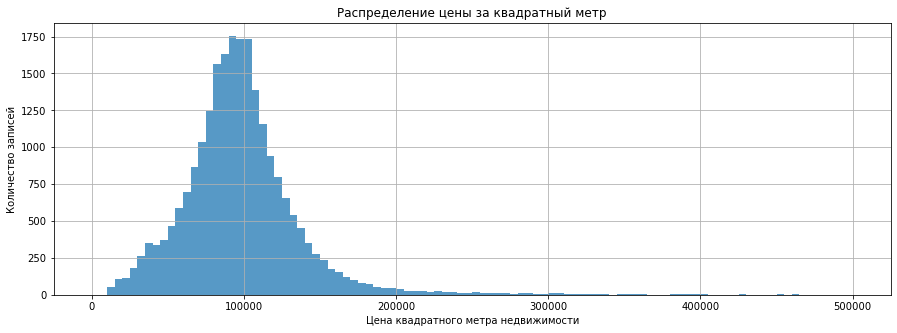

In [67]:
df['prise_sq_m'] = df['last_price'] / df['total_area']
(df['prise_sq_m'].hist(bins=100, range=(0, 500e3), figsize=(15, 5), alpha = 0.75)
    .set(xlabel='Цена квадратного метра недвижимости', ylabel='Количество записей', 
         title='Распределение цены за квадратный метр'));

In [68]:
df['prise_sq_m'].describe()

count    2.321800e+04
mean     9.883685e+04
std      4.700291e+04
min      7.962963e+03
25%      7.656914e+04
50%      9.489714e+04
75%      1.139394e+05
max      1.736842e+06
Name: prise_sq_m, dtype: float64

Распределение цены квадратного метра в целом имеет вид номального распределения, однако справа наблюдается длинный хвост. С целью избежания аномалий при оценках, уберем из выборки строки с необычно высокой стоимостью квадратного метра

In [69]:
df = df.drop(df[df['prise_sq_m']>300000].index)
(df['prise_sq_m']>300000).sum()

0

#### День недели, месяц и год публикации объявления

In [70]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year
df['exposition_year']

0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: exposition_year, Length: 23071, dtype: int64

#### Этаж квартиры

In [71]:
# Функция floor_classificator принимает на вход строку данных и в зависимости от этажа квартиры и количества этажей в доме
# сообщает находится квартира на первом последнем или другом этаже
def floor_classificator(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [72]:
df['floor_classificated'] = df.apply(floor_classificator, axis=1)
df['floor_classificated'].astype('category')

0        другой
1        первый
2        другой
4        другой
5        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_classificated, Length: 23071, dtype: category
Categories (3, object): ['другой', 'первый', 'последний']

#### Соотношение жилой и общей площади, а также отношение площади кухни к общей площади
Соотношение жилой площади к общей уже введено на этапе предобработки данных в столбец living_area_fraction. В столбце же kitchen_area_fraction хранится отношение площади кухни к нежилой площади. Отношение площади кухни к общей площади сохраним в столбце kitchen_area_total_fraction

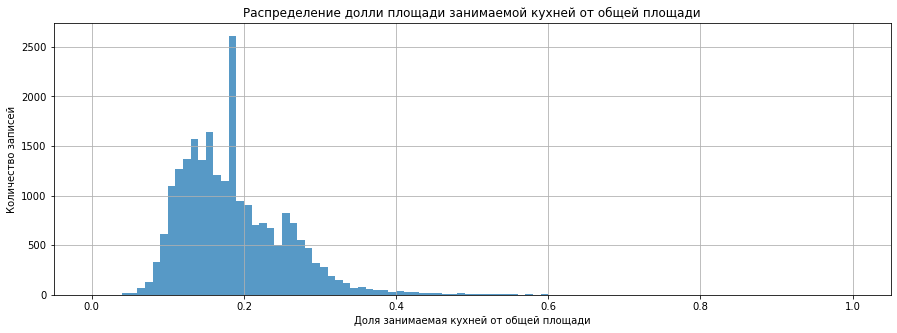

In [73]:
df['kitchen_area_total_fraction'] = df['kitchen_area'] / df['total_area']
(df['kitchen_area_total_fraction'].hist(bins=100, range=(0, 1), figsize=(15, 5), alpha = 0.75)
    .set(xlabel='Доля занимаемая кухней от общей площади', ylabel='Количество записей', 
         title='Распределение долли площади занимаемой кухней от общей площади'));

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
#### Факторы влияющие на стоимость квартиры
Для оценки факторов влияющих на стоимость квартиры оценим корреляцию параметров в датафрейме

In [74]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,ponds_nearest,days_exposition,living_area_fraction,kitchen_area_fraction,days_passed,prise_sq_m,exposition_weekday,exposition_month,exposition_year,kitchen_area_total_fraction
total_images,1.000000,0.152930,0.118297,0.092827,0.041582,0.012776,0.101102,0.034868,-0.028452,-0.021746,...,0.000174,-0.050867,0.002498,-0.032660,0.150419,0.147785,-0.007946,0.005047,0.143075,-0.018892
last_price,0.152930,1.000000,0.811699,0.520272,0.425212,0.045018,0.722188,0.060409,-0.049240,-0.030210,...,-0.105981,0.106547,0.021063,-0.168083,-0.041993,0.664438,-0.011881,0.003834,-0.041593,-0.115894
total_area,0.118297,0.811699,1.000000,0.794260,0.399528,-0.063882,0.941956,-0.025380,-0.085712,-0.049519,...,-0.081684,0.133753,0.188386,-0.347257,-0.081603,0.207312,-0.011864,0.006664,-0.080473,-0.323842
rooms,0.092827,0.520272,0.794260,1.000000,0.239360,-0.221717,0.866215,-0.152514,-0.079328,-0.045674,...,-0.048796,0.095430,0.542012,-0.424712,-0.053688,-0.025338,-0.005903,-0.002054,-0.051162,-0.577155
ceiling_height,0.041582,0.425212,0.399528,0.239360,1.000000,-0.076636,0.369081,-0.042628,0.002671,-0.003440,...,-0.101993,0.088006,-0.005621,-0.021591,-0.051409,0.293293,-0.020078,-0.002393,-0.048667,-0.007252
floors_total,0.012776,0.045018,-0.063882,-0.221717,-0.076636,1.000000,-0.162931,0.676808,0.070920,0.046130,...,0.035151,-0.037946,-0.388460,0.159737,0.012534,0.249489,0.011196,0.016758,0.007430,0.331478
living_area,0.101102,0.722188,0.941956,0.866215,0.369081,-0.162931,1.000000,-0.099784,-0.064720,-0.036549,...,-0.067352,0.121980,0.475452,-0.348496,-0.074336,0.120192,-0.010382,0.002168,-0.072243,-0.501446
floor,0.034868,0.060409,-0.025380,-0.152514,-0.042628,0.676808,-0.099784,1.000000,0.036857,0.030820,...,0.024313,-0.030684,-0.279870,0.102944,0.012079,0.195996,0.009694,0.020361,0.005861,0.231282
studio,-0.028452,-0.049240,-0.085712,-0.079328,0.002671,0.070920,-0.064720,0.036857,1.000000,-0.003885,...,-0.003678,-0.014685,0.092760,NaN,0.011011,0.025561,-0.001738,0.000314,0.010781,-0.056857
open_plan,-0.021746,-0.030210,-0.049519,-0.045674,-0.003440,0.046130,-0.036549,0.030820,-0.003885,1.000000,...,0.001056,-0.017674,0.052968,NaN,-0.014896,0.007309,0.010358,0.022445,-0.020753,-0.032676


Наибольшим образом на стоимость квартиры влияют (в скобках указан коэффициент корелляции): площадь квартиры (0,81), число комнат (0,52), высота потолков (0,42), жилая площадь (0,72), площадь кухни (0,62), цена квадратного метра недвижимости (0,66). Строго говоря параметры площадь квартиры, жилая площадь, площадь кухни, цена квадратного метра недвижимости являются производными друг от друга поэтому из перечисленных параметров можно оставить только наиболее влияющий на стоимость - площадь квартиры. Зависимости стоимости квартиры от дня недели, месяца или года размещения объявления не выявлено (коэффиценты корелляции -0,012; 0,003; -0,042). А вот корелляция стоимости квартиры с расстоянием до центра города получилась отрицательная (чем меньше расстояние до центра тем выше стоимость). Посмотрим как выглядят зависимости площали квартиры, числа комнат, высоты потолков и цены квартиры

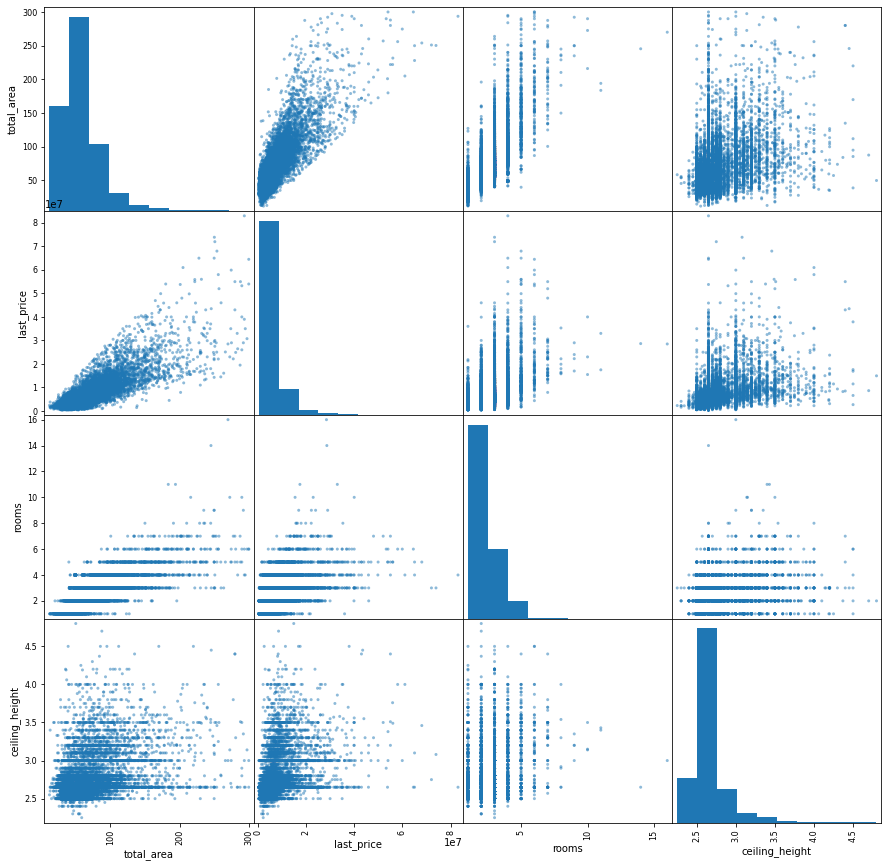

In [75]:
pd.plotting.scatter_matrix(df.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize=(15,15));

In [76]:
# еще раз для наглядности выведем таблицу корреляции, но уже только по выбранным параметрам
df.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.811699,0.794260,0.399528
last_price,0.811699,1.000000,0.520272,0.425212
rooms,0.794260,0.520272,1.000000,0.239360
ceiling_height,0.399528,0.425212,0.239360,1.000000


Оценим зависимость стоимости квартиры от того на каком этаже расположена квартира: первом, последнем или другом

In [77]:
df.groupby('floor_classificated')['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_classificated,,,
другой,16989,6150259.0,4800000.0
первый,2853,4546569.0,3900000.0
последний,3229,5834104.0,4285000.0


Как средняя так и медианная стоимость квартир расположенных на крайних этажах ниже, чем аналогичная стоимость квартир расположенных на других этажах. Посмотрим распределения стоимости квартир в зависимости от этажности

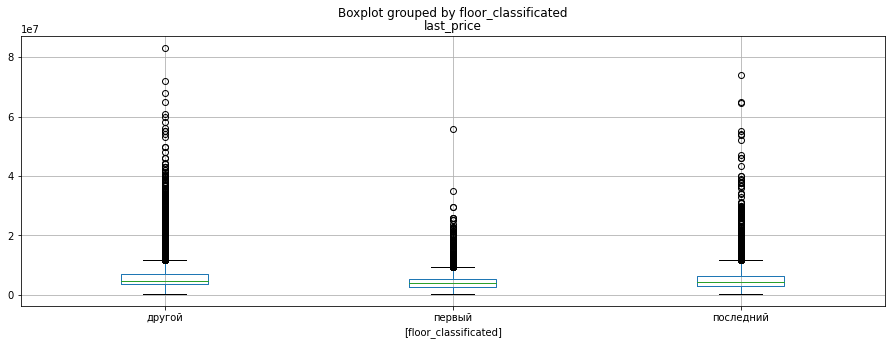

In [78]:
df.loc[:,['last_price', 'floor_classificated']].boxplot(by='floor_classificated', figsize=(15,5));

Из распределений видно что квартиры на первом этаже в большинстве случаев продаются с дисконтом.
Таким образом больше вссего на стоимость квартиры влияют следующие факторы:
* площадь квартиры
* число комнат
* высота потолков
* расположение на крайнем/не крайнем этаже
* близость к центру

#### Анализ цен по населенным пунктам
Выберем 10 городов с наибольшим числом объявлений

In [79]:
df.groupby('locality_name')['last_price'].agg(['count','mean','median']).sort_values('count', ascending=False).head(10)

,count,mean,median
locality_name,,,
Санкт-Петербург,15271,7131808.00,5500000.0
посёлок Мурино,509,3674547.50,3400000.0
посёлок Шушары,436,4111977.00,3950000.0
Всеволожск,390,3743534.00,3465000.0
Пушкин,366,6298837.00,5165000.0
Колпино,335,3871251.50,3600000.0
посёлок Парголово,325,4485263.00,4100000.0
Гатчина,301,3493918.25,3090000.0
деревня Кудрово,294,4230490.50,3785000.0


Наибольшая средняя стоимость жилья из ТОП-10 популярных городов наблюдается в Санкт-Перербурге, а наименшая средняя - в Выборге

#### Оценка особенностец ценообразования квартир в центре Санкт-Перербурга
Построим график зависимости медианной цены квартиры от расстояния до центра города

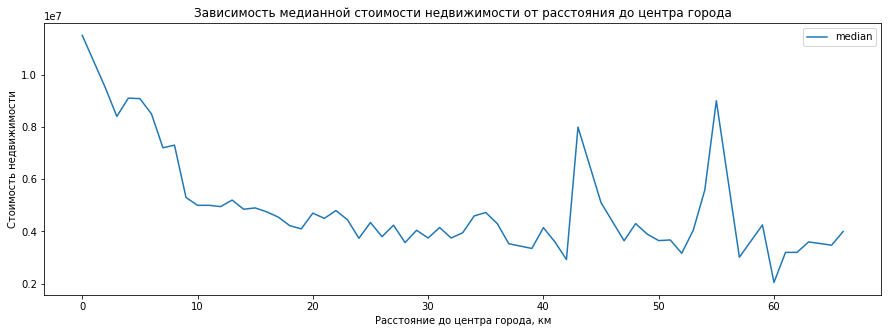

In [80]:
df['city_centers_nearest_km'] = round(df['cityCenters_nearest'] / 1000)
(df.groupby('city_centers_nearest_km')['last_price'].agg(['median']).plot(y='median', figsize=(15,5))
    .set(xlabel='Расстояние до центра города, км', ylabel='Стоимость недвижимости', 
         title='Зависимость медианной стоимости недвижимости от расстояния до центра города'));

Медианная стоимость жилья начинает резко увеличиваться при расстоянии до центра менее 9 км. Данную область и будем принимать за центр города. Проанализируем эту территорию и изучим зависимость стоимости недвижимости от следующих параметров: площади,числа комнат и высоты потолков

In [81]:
df.query('city_centers_nearest_km <= 9').loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.801496,0.803899,0.319850
last_price,0.801496,1.000000,0.517873,0.257408
rooms,0.803899,0.517873,1.000000,0.283159
ceiling_height,0.319850,0.257408,0.283159,1.000000


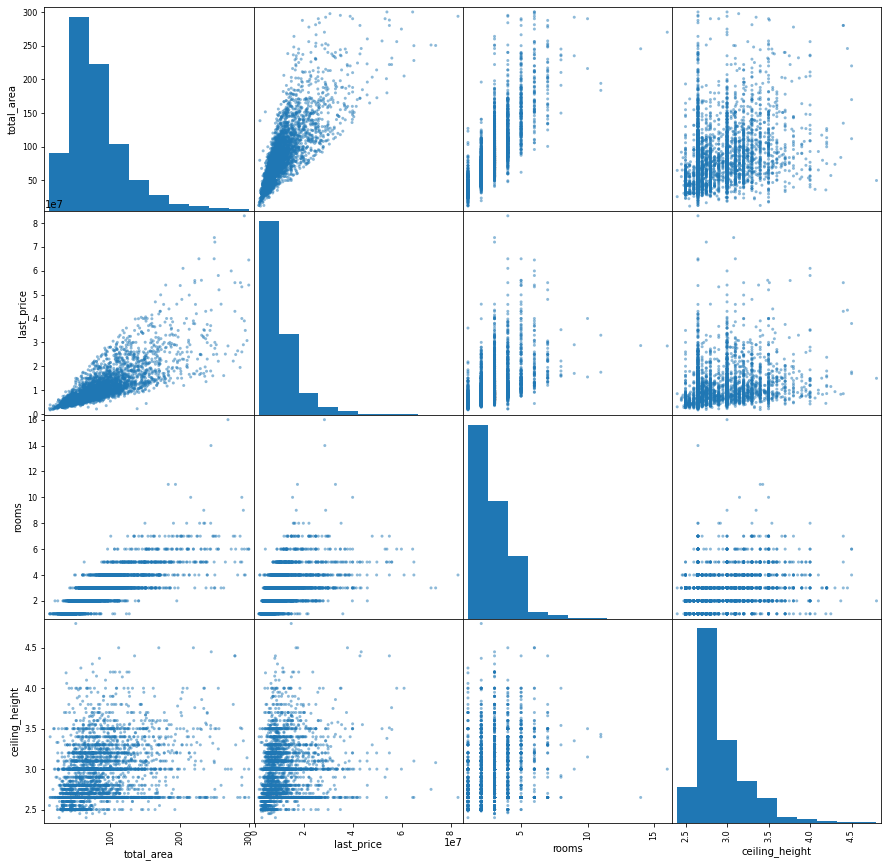

In [82]:
pd.plotting.scatter_matrix(df
                           .query('city_centers_nearest_km <= 9')
                           .loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']], figsize=(15,15)
                          );

На цену квартир расположенных в центре Санкт-Петербурга общая площадь и число комнат влияют в той же степени что и на все квартиры, а влияние высоты потолков несколько снижено (коэффицент корреляции 0,26 вместо 0,43). Оценим влияет ли дата размещения объявления о продаже квартиры в центре на стоимость

In [83]:
(df.query('city_centers_nearest_km <= 9')
 .loc[:, ['last_price', 'exposition_weekday', 'exposition_month', 'exposition_year']]
 .corr()
)

,last_price,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,-0.007068,0.003122,-0.051256
exposition_weekday,-0.007068,1.000000,0.030851,0.001004
exposition_month,0.003122,0.030851,1.000000,-0.248037
exposition_year,-0.051256,0.001004,-0.248037,1.000000


День недели, месяц и год размещения объявления влияния на цену квартиры не оказывают. Посмотрим так же распределения стоимости квартир в центре в зависимости от этажности

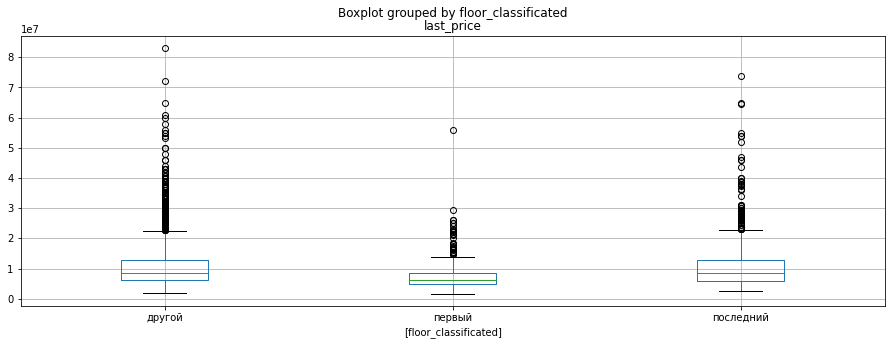

In [84]:
(df.query('city_centers_nearest_km <= 9')
 .loc[:,['last_price', 'floor_classificated']]
 .boxplot(by='floor_classificated', figsize=(15,5))
);

In [85]:
df.query('city_centers_nearest_km <= 9').groupby('floor_classificated')['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_classificated,,,
другой,3249,10761171.0,8500000.0
первый,466,7428493.0,6195000.0
последний,727,10954352.0,8495000.0


Стоимость квартир на первом этаже в центре так же как и раньше ниже чем стоимость остальных квартир, а вот стоимость квартир на последнем этаже практически равна стоимости квартир на остальных этажах, что является особенностью квартир расположенных в центре.
Таким образом на стоимость квартир в центре влияют те же факторы, что и на стоимость других квартир, однако степень их влияния может отличаться

### Шаг 5. Общий вывод

**В процессе данного исследования были проведены следующие работы:**
1. Проведен обзор предоставленных данных, изучена общая информация выявленны ключевые проблемы которые необходимо решить на этапе предобработки данных
2. Проведена предобработка данных, в данных заполнены пропуски, где возможно, устранены анамалии, заменены типы данных
3. В данных созданы дополнительные столбцы содержащие цену квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры (первый, последний, другой); соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. Исследованы поставленные вопросы

**По результатам исследования установлено:**
* Основную массу в продажах занимают 1-3 комнатные квартиры в пяти или девяти этажных зданиях.
* Распределение жилой площади фактически состоит из суммы трех нормальных распределений (мод). Первая мода с матожиданием в районе 18 м² сформирована из однокомнатных квартир, мода с матожиданием в районе 30 м² сформирована из двухкомнатных квартир, а третья мода формирующая "юбку" представлена остальными квартирами.
* В среднем жилая площадь составляет 56% от общей площади квартиры.
* В среднем кухня занимает 42% нежилой площади.
* Подавляющее большинство квартир имеют не более двух балконов.
* Подавляющее большинство квартир в выборке расположено в Санкт-Перербурге при этом в нем наибольшая средняя стоимость жилья из ТОП-10 популярных городов. Наименьшая средняя стоимость жилья из ТОП-10 популярных городов наблюдается в Выборге
* Половина объявлений о продаже держится в пределах 100 дней, но многие объявления висят годами. При этом продажи в пределах 100 дней можно считать "быстрыми". Продажи более 600 дней можно считать "необычно долгими".  Так же следут отметить что популярность сервиса (количество объявлений) начало значительно увеличиваться примерно за два года до окончания приведенного в данных периода. 
* Более всего на стоимость квартиры влияют следующие факторы:
    * площадь квартиры
    * число комнат
    * высота потолков
    * расположение на крайнем/не крайнем этаже
    * близость к центру
* Следует отметить что для квартир расположенных в центре влияне высоты потолков на стоимость несколько снижается, а стоимость квартир расположенных на последних этажах не отличается от стоимости квартир расположенных на других этажах. Стоимость квартиры расположенной на первом этаже в большинстве случаев ниже стоимости квартиры на других этажах не зависимо от того в центре она расположена или нет.
* Влияния дня недели, месяца или года размещения объявления на стоимость квартиры по представленной выборке выявить не удалось

**Рекомендации:**

При построении системы автоматической оценки стоимости недвижимости рекомендуется помимо отмеченных абсолютных параметров (площадь квартиры, число комнат и т.д.) так же оценивать нормированные параметры (отношение жилой площади к общей, цена квадратного метра и т.п.) это может позволить эффективно отслеживать и при необходимости устранять аномалии в данных.
